In [12]:
!pip3 install pandas numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 37.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 56.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

structured_endometriosis_data = pd.read_csv('structured_endometriosis_data.csv')

In [4]:
structured_endometriosis_data

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1
...,...,...,...,...,...,...,...
9995,37,1,3.153169,1,0,18.318849,0
9996,44,0,4.044800,1,1,24.732344,0
9997,39,0,5.096384,1,1,34.204883,1
9998,47,1,7.598862,1,1,30.374964,1


In [5]:
structured_endometriosis_data.isna().sum()

Age                          0
Menstrual_Irregularity       0
Chronic_Pain_Level           0
Hormone_Level_Abnormality    0
Infertility                  0
BMI                          0
Diagnosis                    0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Menstrual_Irregularity'}>,
        <Axes: title={'center': 'Chronic_Pain_Level'}>],
       [<Axes: title={'center': 'Hormone_Level_Abnormality'}>,
        <Axes: title={'center': 'Infertility'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Diagnosis'}>, <Axes: >, <Axes: >]],
      dtype=object)

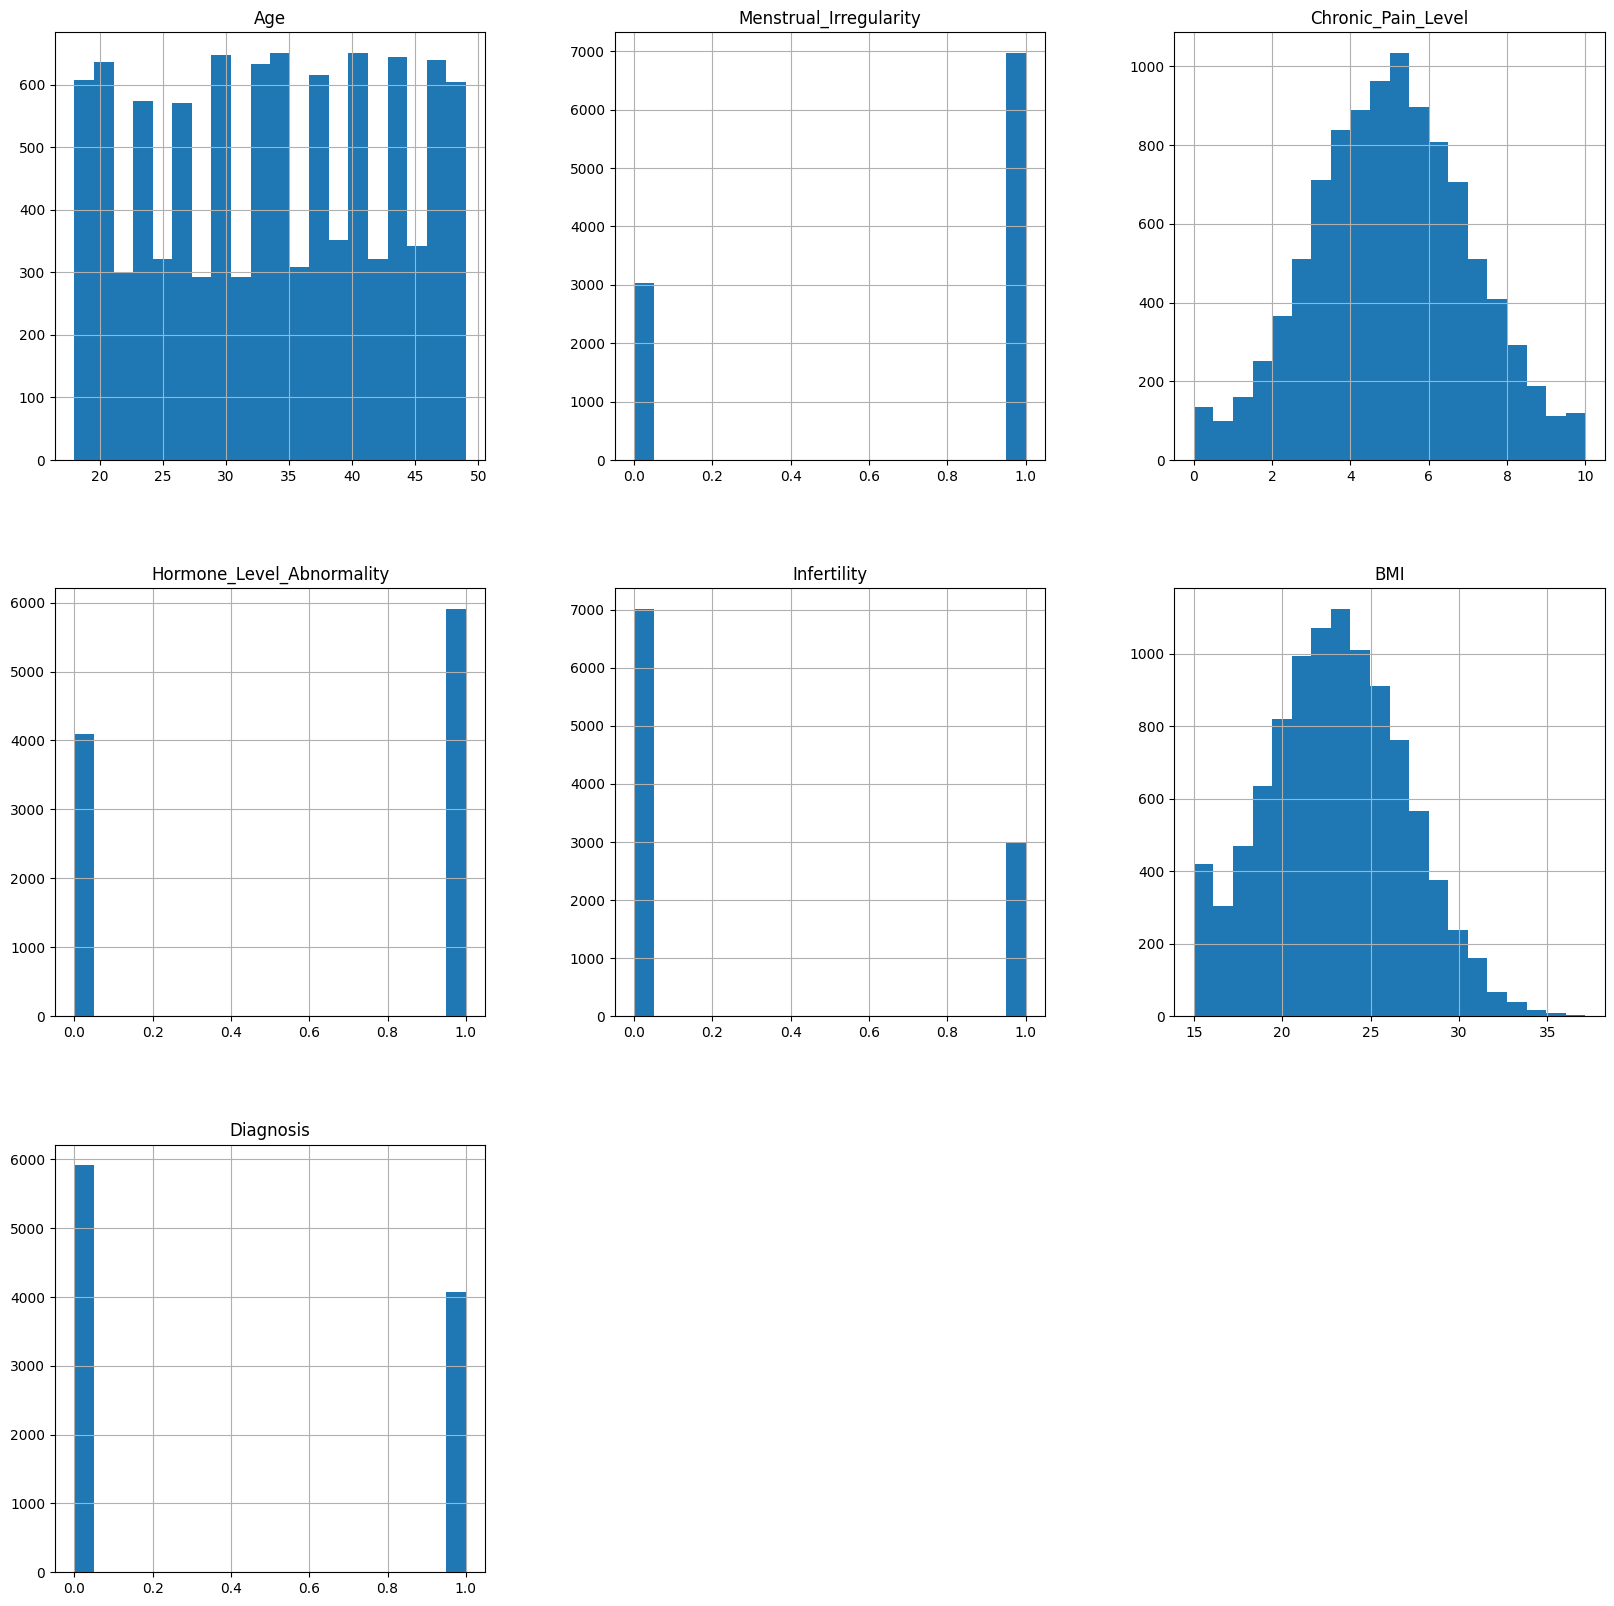

In [9]:
structured_endometriosis_data.hist(bins=20, figsize=[20,20])

In [13]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

X = structured_endometriosis_data[['Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level',
          'Hormone_Level_Abnormality', 'Infertility', 'BMI']]
y = structured_endometriosis_data['Diagnosis']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)

LogisticRegression()

In [18]:
predictions = model.predict(X_test)
print("Predictions:", predictions[:10])
print("Actual Labels:", y_test[:10].values)

Predictions: [0 0 0 0 0 0 1 0 0 1]
Actual Labels: [0 0 1 1 0 0 1 0 0 0]


In [19]:
# Combine predictions and actual labels
comparison = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_test.values
})

# Display the first 10 rows
print(comparison.head(10))

   Predicted  Actual
0          0       0
1          0       0
2          0       1
3          0       1
4          0       0
5          0       0
6          1       1
7          0       0
8          0       0
9          1       0


In [20]:
# Calculate accuracy
accuracy = (predictions == y_test.values).mean()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 63.50%


In [21]:
# Add an indicator column for mismatches
comparison['Match'] = comparison['Predicted'] == comparison['Actual']

# Display rows where predictions and actual labels don't match
print(comparison[~comparison['Match']])



      Predicted  Actual  Match
2             0       1  False
3             0       1  False
9             1       0  False
12            0       1  False
13            0       1  False
...         ...     ...    ...
1991          0       1  False
1992          0       1  False
1993          1       0  False
1997          1       0  False
1998          1       0  False

[730 rows x 3 columns]


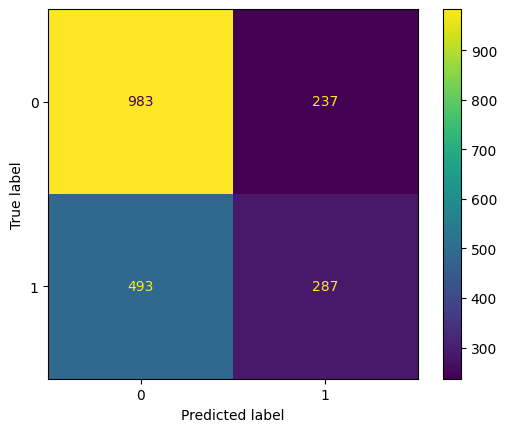

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, predictions)
